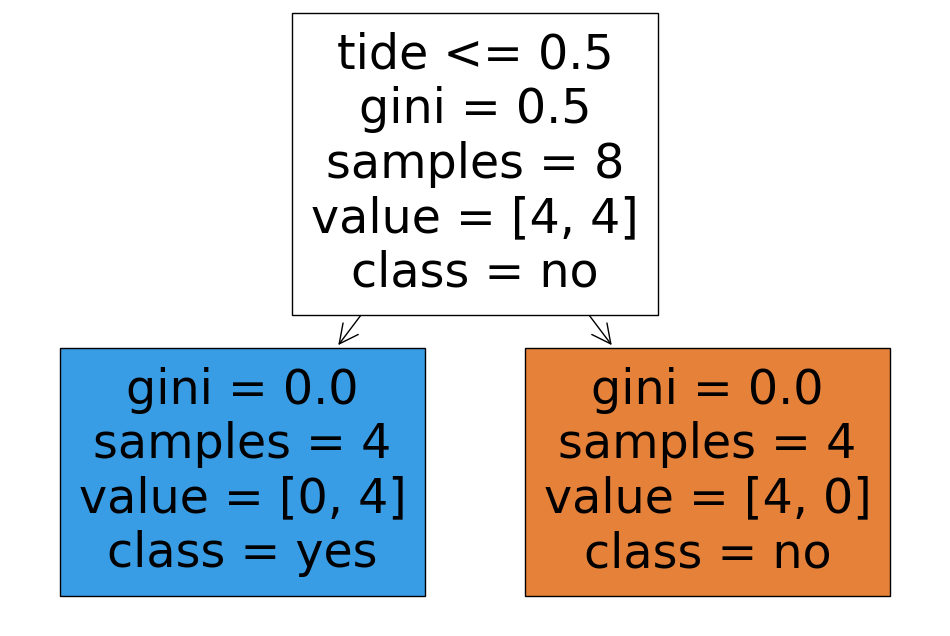

Prediction for N wind, high tide, and medium swell: yes


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

# Example data
data = {
    'wind_direction': ['N', 'S', 'E', 'W', 'N', 'S', 'E', 'W'],
    'tide': ['high', 'low', 'high', 'low', 'high', 'low', 'high', 'low'],
    'swell_forecasting': ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium'],
    'good_waves': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no']
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Encode the categorical values to numeric
le_wind = LabelEncoder()
le_tide = LabelEncoder()
le_swell = LabelEncoder()
le_target = LabelEncoder()

df['wind_direction'] = le_wind.fit_transform(df['wind_direction'])
df['tide'] = le_tide.fit_transform(df['tide'])
df['swell_forecasting'] = le_swell.fit_transform(df['swell_forecasting'])
df['good_waves'] = le_target.fit_transform(df['good_waves'])

# Separate features and target
X = df[['wind_direction', 'tide', 'swell_forecasting']]
y = df['good_waves']

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf = clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['wind_direction', 'tide', 'swell_forecasting'], class_names=['no', 'yes'], filled=True)
plt.show()

# Make a prediction (example)
sample = pd.DataFrame({'wind_direction': [le_wind.transform(['N'])[0]], 'tide': [le_tide.transform(['high'])[0]], 'swell_forecasting': [le_swell.transform(['medium'])[0]]})
prediction = clf.predict(sample)
prediction_label = le_target.inverse_transform(prediction)
print(f'Prediction for N wind, high tide, and medium swell: {prediction_label[0]}')
